In [1]:
# 量子振幅増幅を量子回路で構築するためのソースコード
# 必要なモジュールをインポートする
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.tools.visualization import plot_histogram
import numpy as np

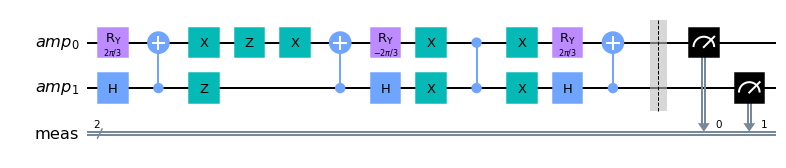

In [3]:
# 量子レジスタを設定
qr_amp = QuantumRegister(2, name='amp')
# 量子回路を作成
circuit = QuantumCircuit(qr_amp)

# 初期状態 A
circuit.ry(2*np.pi/3, 0)
circuit.h(1)
circuit.cx(1,0)

# 振幅増幅
# UΨ_0
circuit.x(0)
circuit.z(0)
circuit.z(1)
circuit.x(0)
# UΨ
circuit.cx(1,0)
circuit.h(1)
circuit.ry(-2*np.pi/3, 0)

circuit.x([0,1])
circuit.cz(0,1)
circuit.x([0,1])

circuit.ry(2*np.pi/3, 0)
circuit.h(1)
circuit.cx(1,0)
# 量子ビットを測定する。
circuit.measure_all()
circuit.draw(output='mpl')

{'00': 506, '11': 494}


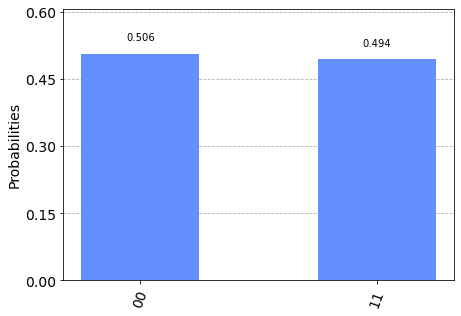

In [4]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
shots = 1000
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
# 結果を出力＆プロットする。
print(answer)
plot_histogram(answer)